In [2]:
import pandas as pd

# Load the dataset

df = pd.read_csv("C:/Users/KRUSHNA KOUSHIK/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first few rows of the dataframe
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


HANDLING NULL VALUES AND DATA TRANSFORMATION

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 36:
        return '2-3 years'
    elif tenure <= 48:
        return '3-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df['tenure_group'] = df['tenure'].apply(tenure_group)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year


In [8]:
# Transform 'Partner' and 'Dependents' into numerical values
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create 'num_family_members' column
df['num_family_members'] = df['Partner'] + df['Dependents']

# Display the first few rows to verify the new column
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_family_members
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,1
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,0
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,0


In [9]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_family_members
7038,6840-RESVB,Male,0,1,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1-2 years,2
7039,2234-XADUH,Female,0,1,1,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,2
7040,4801-JZAZL,Female,0,1,1,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 year,2
7041,8361-LTMKD,Male,1,1,0,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 year,1
7042,3186-AJIEK,Male,0,0,0,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,5+ years,0


In [10]:
# Convert "No phone service" to "No" in 'PhoneService' and 'MultipleLines' columns
df['PhoneService'] = df['PhoneService'].replace('No phone service', 'No')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_family_members
0,7590-VHVEG,Female,0,1,0,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,1
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,0
3,7795-CFOCW,Male,0,0,0,45,No,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,0


In [11]:
# Convert specified columns to binary (Yes as 1, No as 0, No internet service remains the same)
binary_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Apply the transformation
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 'No internet service'))

# Display the first few rows to verify the changes
df[binary_columns].head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0


In [12]:
# Create 'num_subscribed_services' column by summing the binary columns
df['num_subscribed_services'] = df[binary_columns].applymap(lambda x: 0 if x == 'No internet service' else x).sum(axis=1)

# Display the first few rows to verify the changes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_family_members,num_subscribed_services
0,7590-VHVEG,Female,0,1,0,1,No,No,DSL,0,...,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,1,1
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,1,...,0,One year,No,Mailed check,56.95,1889.50,No,2-3 years,0,2
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,1,...,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,0,2
3,7795-CFOCW,Male,0,0,0,45,No,No,DSL,1,...,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years,0,3
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,0,...,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,0,0


In [13]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_family_members,num_subscribed_services
7038,6840-RESVB,Male,0,1,1,24,Yes,Yes,DSL,1,...,1,One year,Yes,Mailed check,84.80,1990.50,No,1-2 years,2,5
7039,2234-XADUH,Female,0,1,1,72,Yes,Yes,Fiber optic,0,...,1,One year,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,2,4
7040,4801-JZAZL,Female,0,1,1,11,No,No,DSL,1,...,0,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 year,2,1
7041,8361-LTMKD,Male,1,1,0,4,Yes,Yes,Fiber optic,0,...,0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 year,1,0
7042,3186-AJIEK,Male,0,0,0,66,Yes,No,Fiber optic,1,...,1,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,5+ years,0,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7043 non-null   object 
 1   gender                   7043 non-null   object 
 2   SeniorCitizen            7043 non-null   int64  
 3   Partner                  7043 non-null   int64  
 4   Dependents               7043 non-null   int64  
 5   tenure                   7043 non-null   int64  
 6   PhoneService             7043 non-null   object 
 7   MultipleLines            7043 non-null   object 
 8   InternetService          7043 non-null   object 
 9   OnlineSecurity           7043 non-null   object 
 10  OnlineBackup             7043 non-null   object 
 11  DeviceProtection         7043 non-null   object 
 12  TechSupport              7043 non-null   object 
 13  StreamingTV              7043 non-null   object 
 14  StreamingMovies         

In [15]:
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the overall churn rate
churn_rate = df['Churn_numeric'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

Overall churn rate: 26.54%


In [16]:
df.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
tenure_group               0
num_family_members         0
num_subscribed_services    0
Churn_numeric              0
dtype: int64

HANDLING OUTLIERS

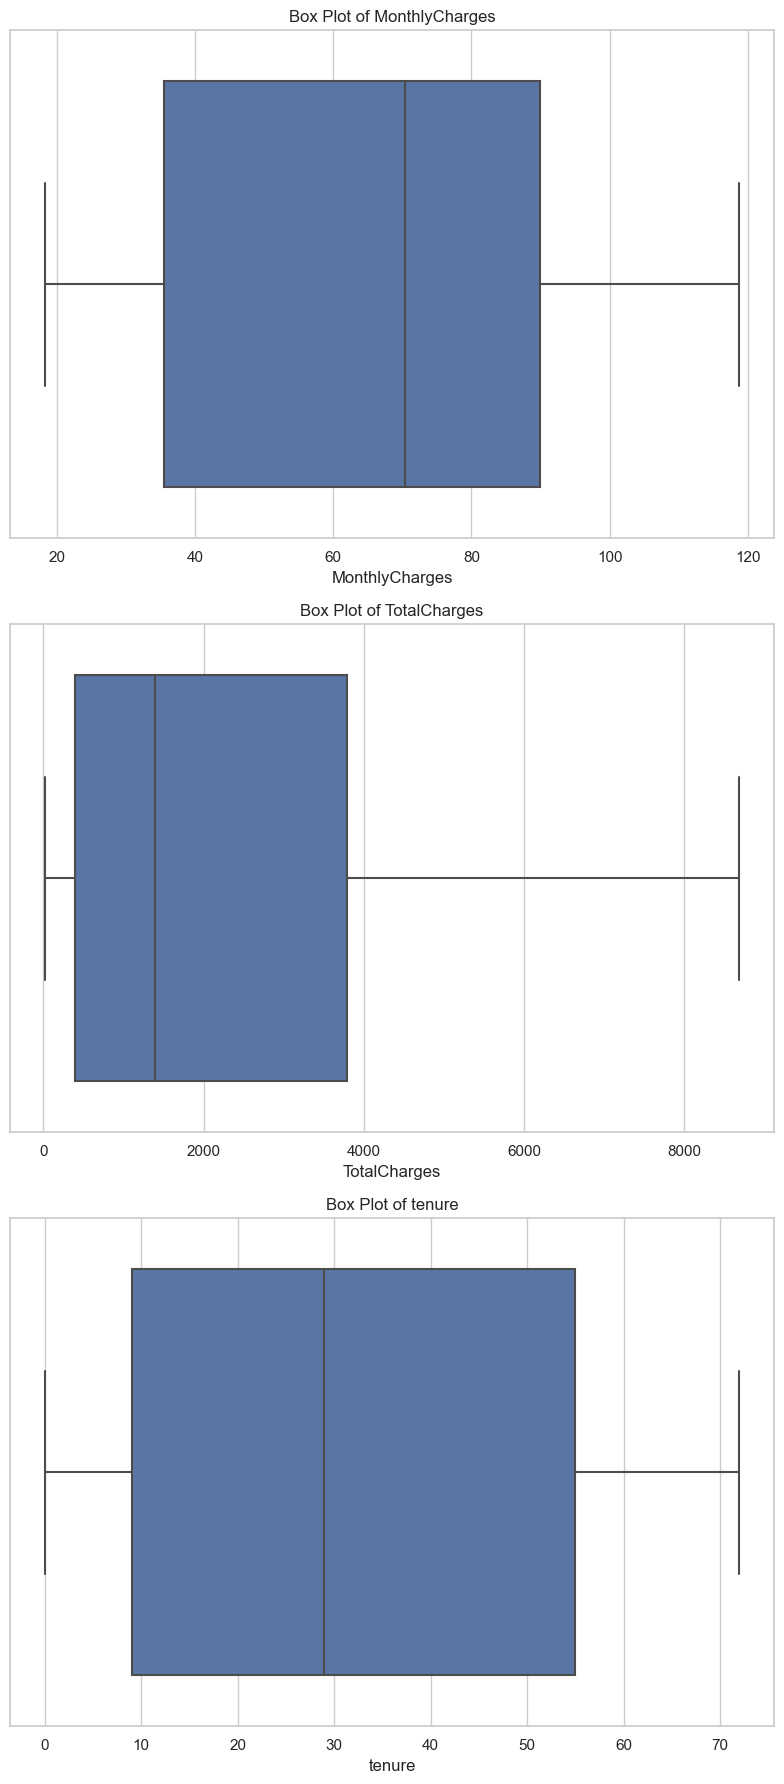

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for box plots
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Box plots
sns.boxplot(ax=axes[0], x=df['MonthlyCharges']).set(title='Box Plot of MonthlyCharges')
sns.boxplot(ax=axes[1], x=df['TotalCharges']).set(title='Box Plot of TotalCharges')
sns.boxplot(ax=axes[2], x=df['tenure']).set(title='Box Plot of tenure')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the box plots
plt.show()


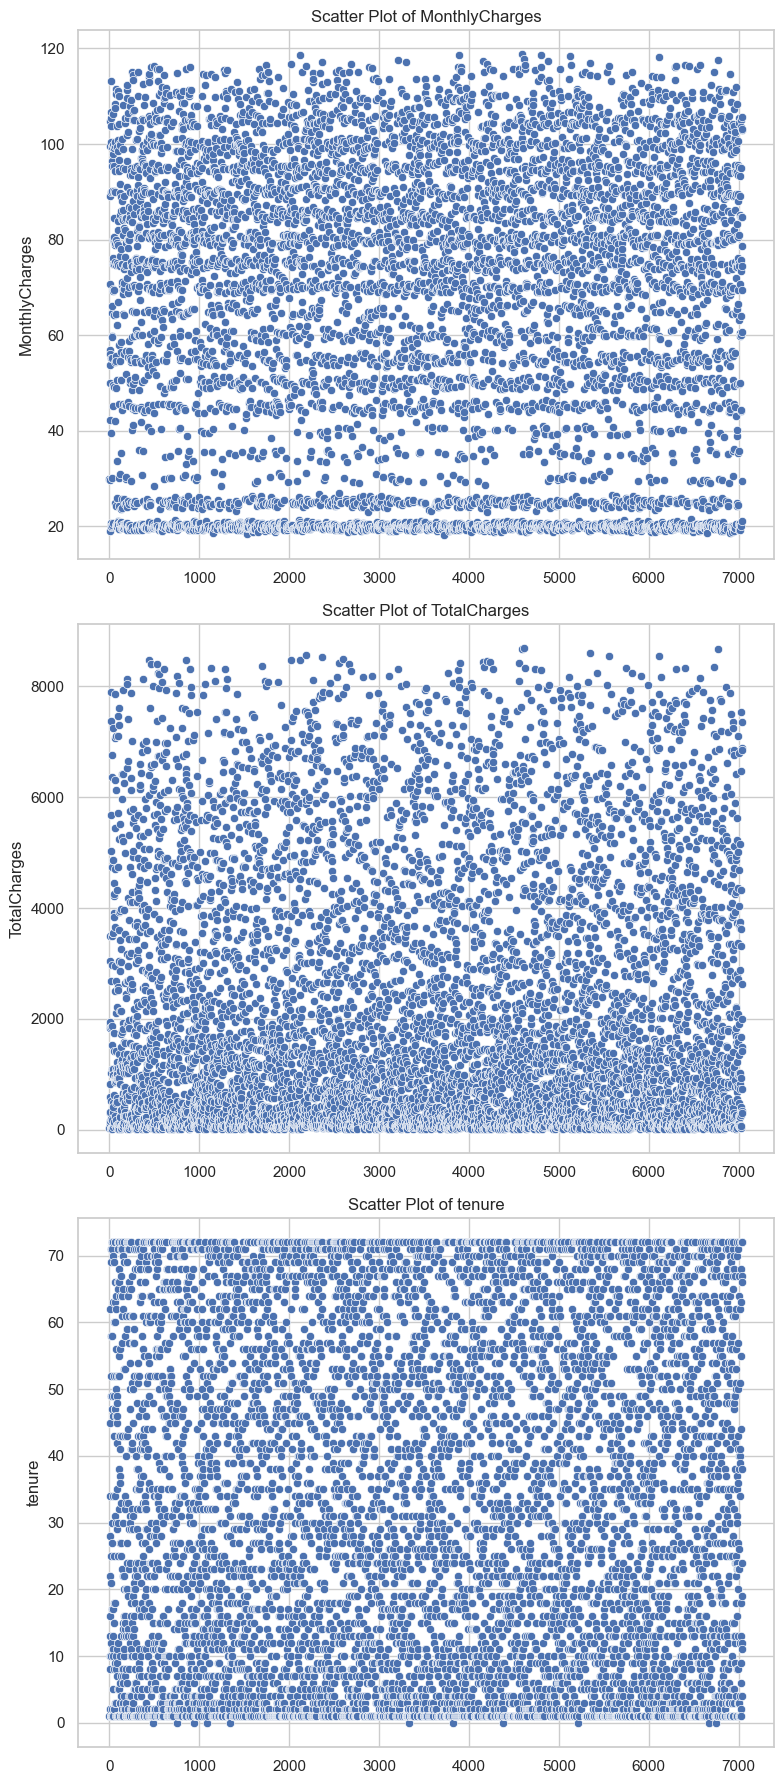

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure for scatter plots
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Scatter plots
sns.scatterplot(ax=axes[0], x=df.index, y=df['MonthlyCharges']).set(title='Scatter Plot of MonthlyCharges')
sns.scatterplot(ax=axes[1], x=df.index, y=df['TotalCharges']).set(title='Scatter Plot of TotalCharges')
sns.scatterplot(ax=axes[2], x=df.index, y=df['tenure']).set(title='Scatter Plot of tenure')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the scatter plots
plt.show()


NO OUTLIERS

Exploratory Data Analysis(EDA)

UNIVARIATE ANALYSIS

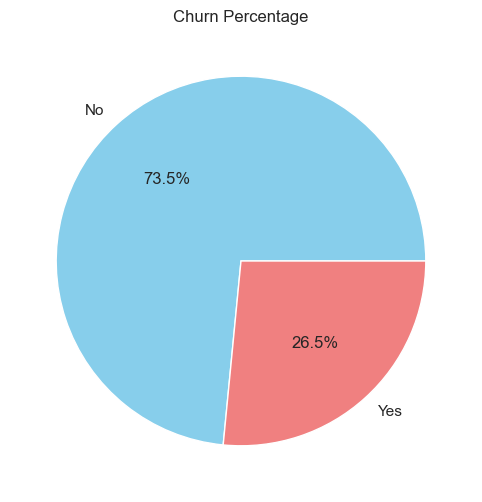

In [18]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Churn Percentage')
plt.ylabel('')
plt.show()


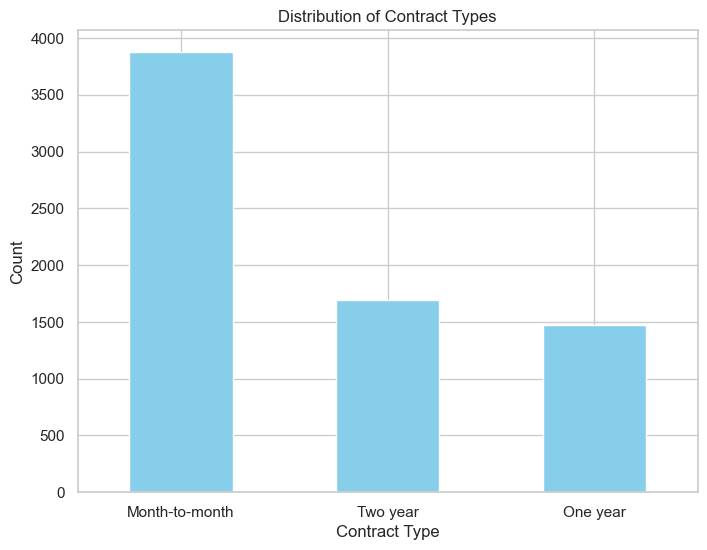

In [45]:
plt.figure(figsize=(8, 6))
df['Contract'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Types')
plt.xticks(rotation=0)
plt.show()


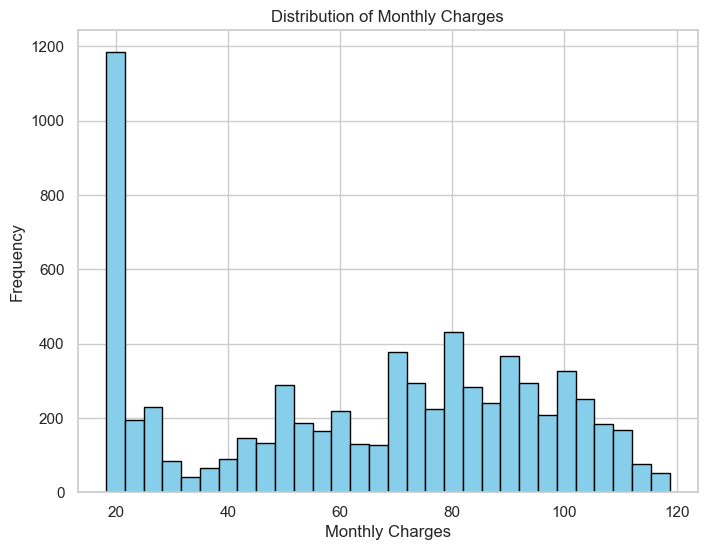

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['MonthlyCharges'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()


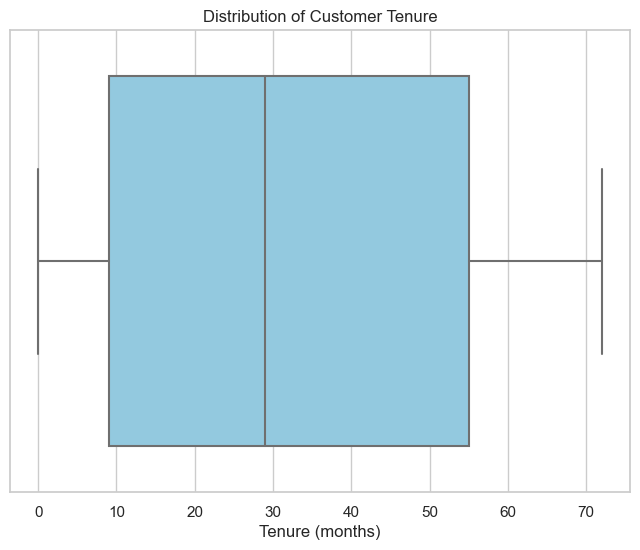

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'], color='skyblue')
plt.xlabel('Tenure (months)')
plt.title('Distribution of Customer Tenure')
plt.show()


C:\Users\KRUSHNA KOUSHIK\AppData\Local\Temp\ipykernel_24560\1854041751.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalCharges'], shade=True, color='skyblue')


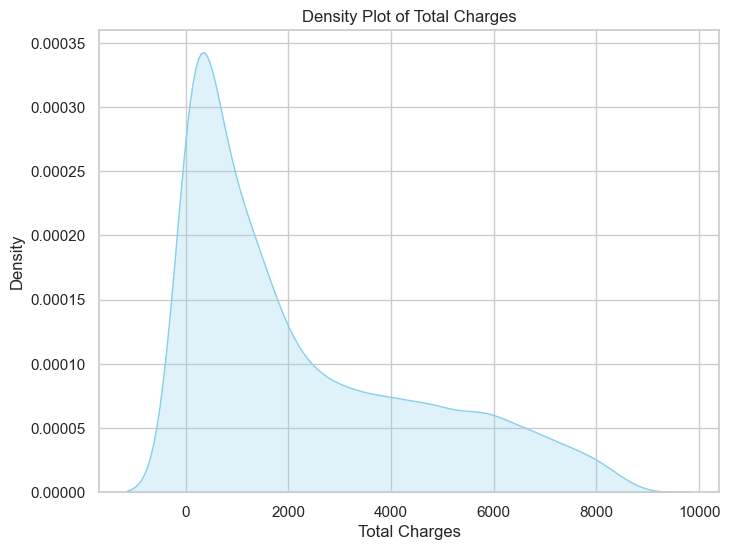

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['TotalCharges'], shade=True, color='skyblue')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Density Plot of Total Charges')
plt.show()


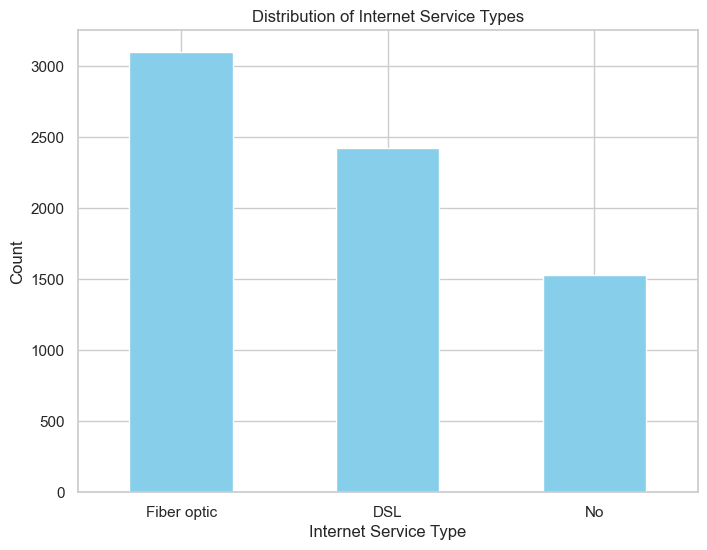

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['InternetService'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.title('Distribution of Internet Service Types')
plt.xticks(rotation=0)
plt.show()


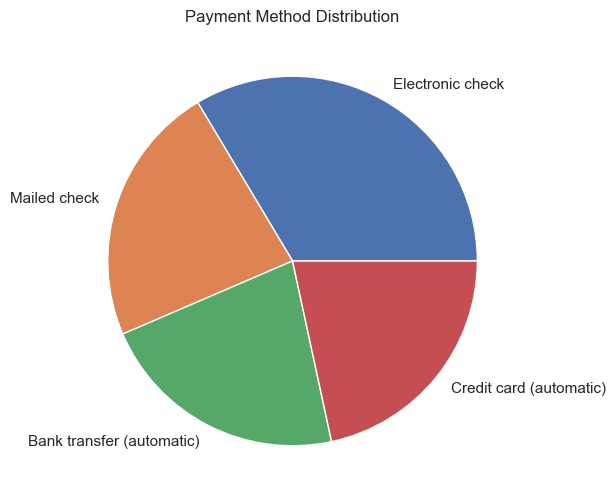

In [23]:
plt.figure(figsize=(8, 6))
df['PaymentMethod'].value_counts().plot(kind='pie')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


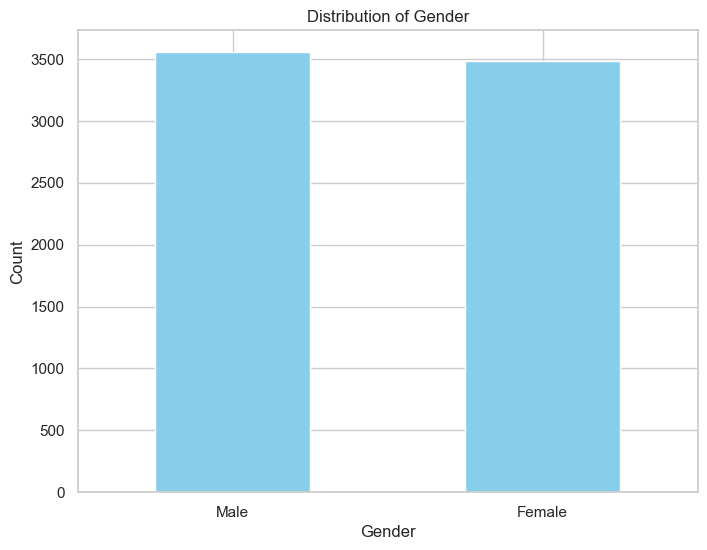

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=0)
plt.show()


BIVARIATE ANALYSIS

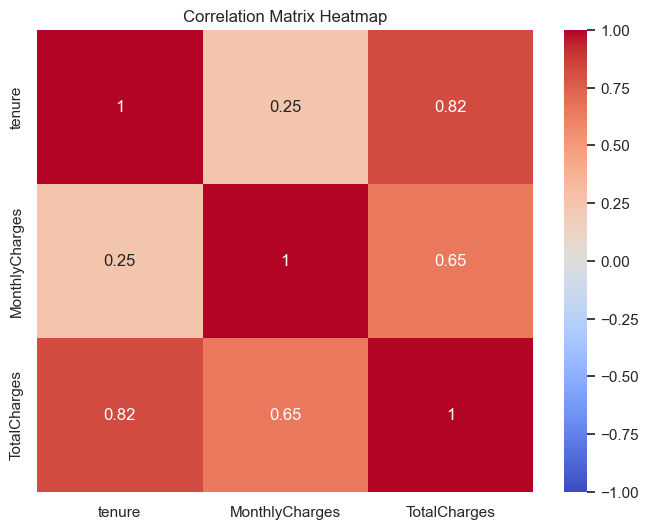

In [25]:
# Create a subset of numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
subset_df = df[numerical_cols]

# Calculate correlation matrix
corr_matrix = subset_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

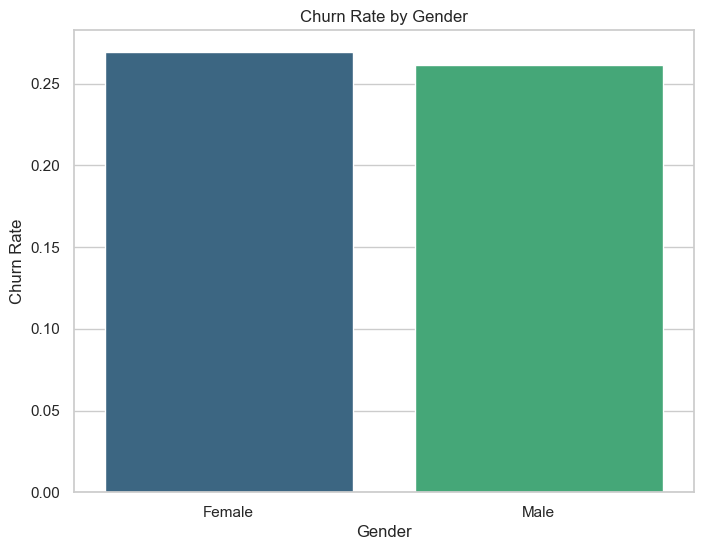

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate by gender
churn_rate_by_gender = df.groupby('gender')['Churn_numeric'].mean().reset_index(name='churn_rate')

# Plotting churn rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='churn_rate', data=churn_rate_by_gender, palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


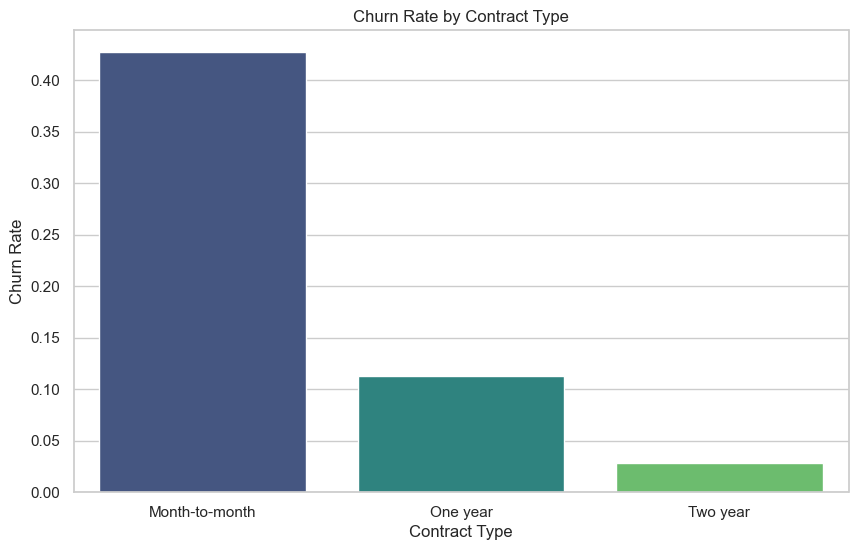

In [68]:
# Calculate churn rate by contract type
churn_rate_by_contract = df.groupby('Contract')['Churn_numeric'].mean().reset_index(name='churn_rate')

# Plotting churn rate by contract type
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='churn_rate', data=churn_rate_by_contract, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()

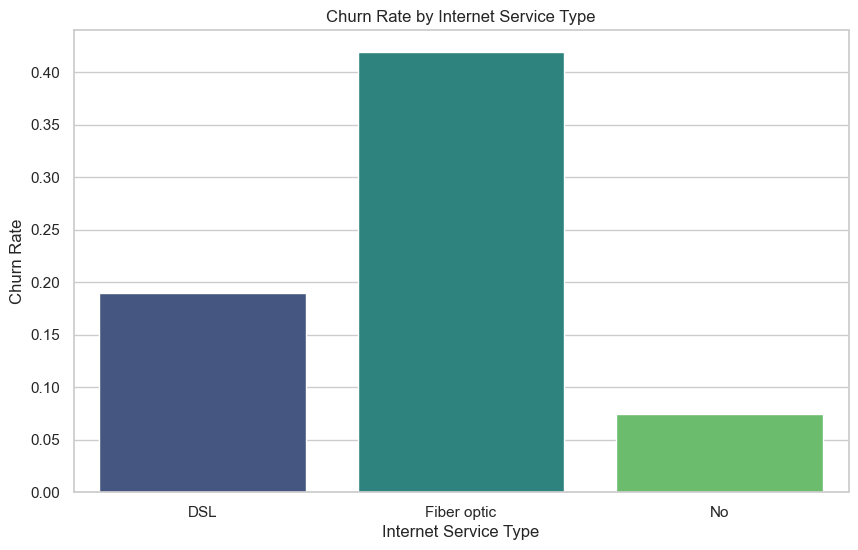

In [70]:
# Calculate churn rate by internet service type
churn_rate_by_internet_service = df.groupby('InternetService')['Churn_numeric'].mean().reset_index(name='churn_rate')

# Plotting churn rate by internet service type
plt.figure(figsize=(10, 6))
sns.barplot(x='InternetService', y='churn_rate', data=churn_rate_by_internet_service, palette='viridis')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()

<Figure size 800x600 with 0 Axes>

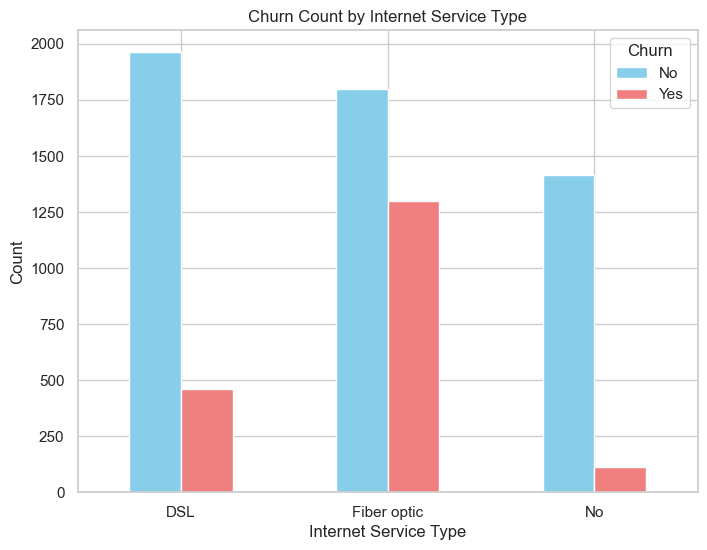

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by internet service type and churn status
internet_churn = df.groupby(['InternetService', 'Churn']).size().unstack()

# Plotting grouped bar chart
plt.figure(figsize=(8, 6))
internet_churn.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()


<Figure size 1000x600 with 0 Axes>

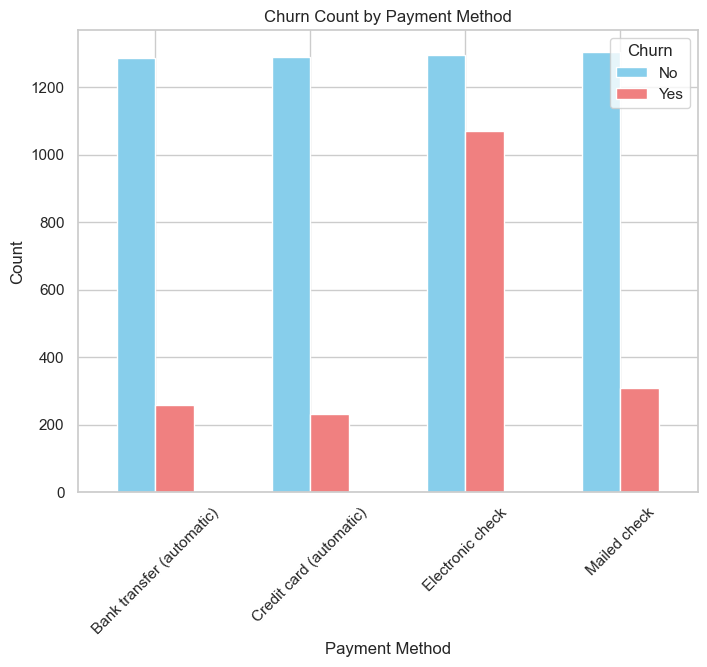

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by payment method and churn status
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Plotting grouped bar chart
plt.figure(figsize=(10, 6))
payment_churn.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()


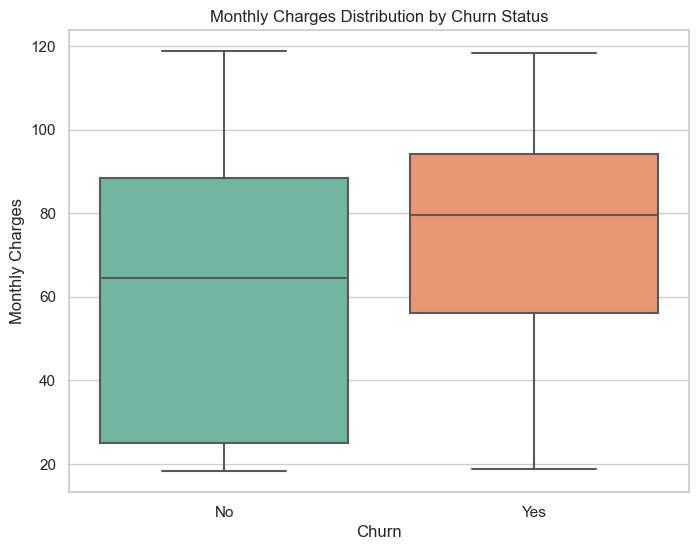

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


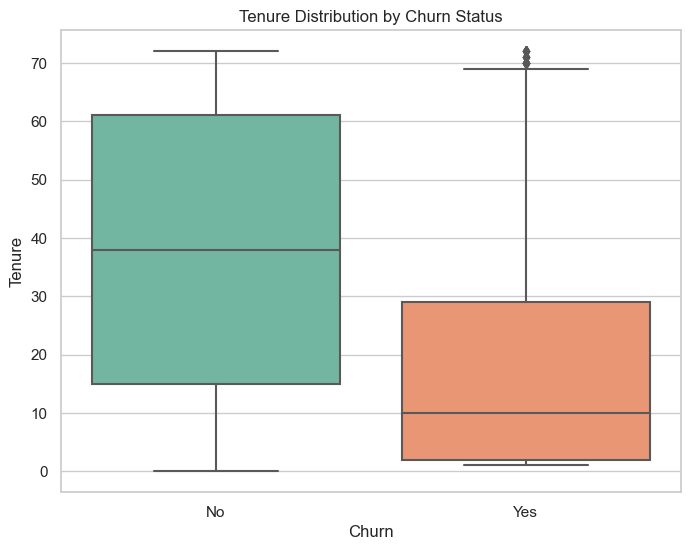

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_family_members,num_subscribed_services,Churn_numeric
0,7590-VHVEG,Female,0,1,0,1,No,No,DSL,0,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,1,1,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,1,...,One year,No,Mailed check,56.95,1889.50,No,2-3 years,0,2,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,1,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,0,2,1
3,7795-CFOCW,Male,0,0,0,45,No,No,DSL,1,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years,0,3,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,0,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,0,0,1


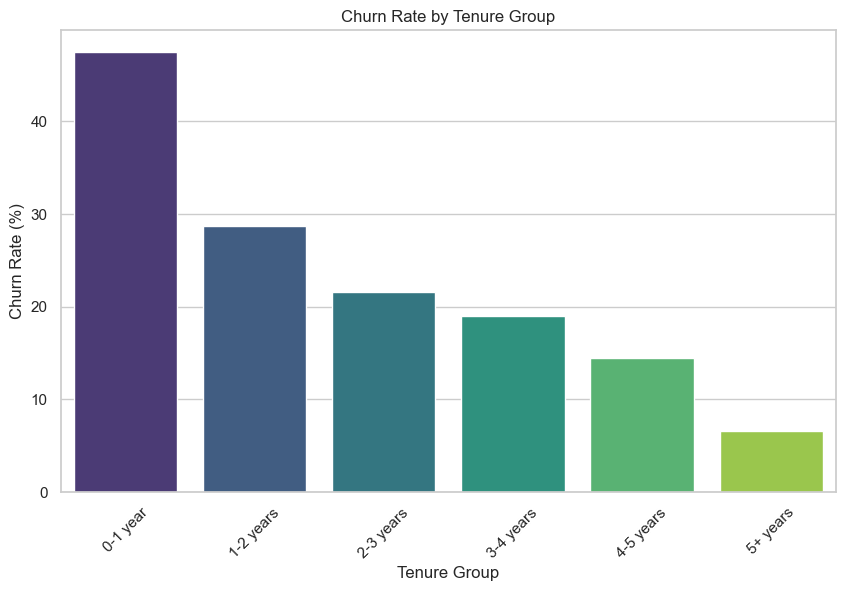

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by tenure_group and calculating churn rate
churn_rate_by_tenure = df.groupby('tenure_group')['Churn_numeric'].mean() * 100

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, palette='viridis')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()


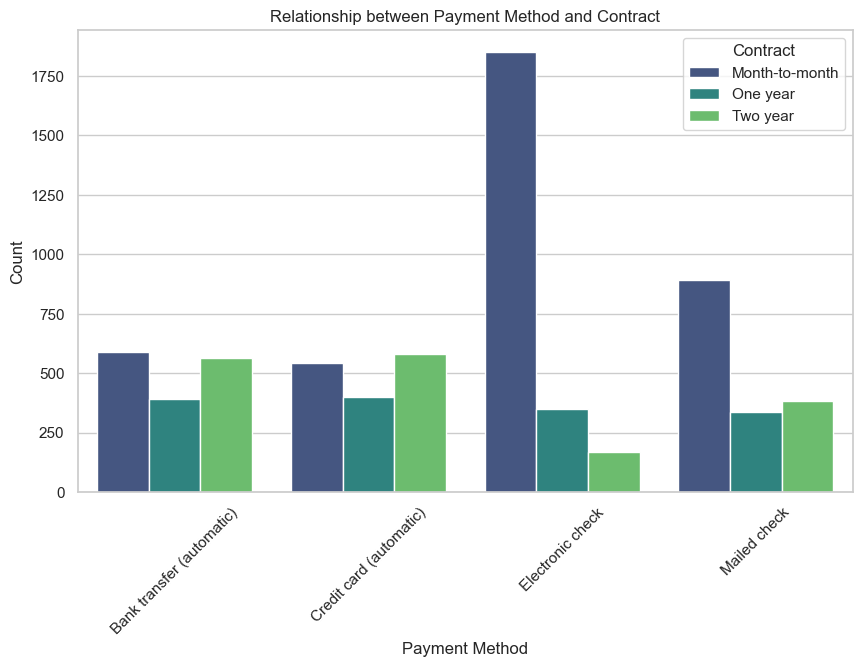

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by PaymentMethod and Contract
grouped_data = df.groupby(['PaymentMethod', 'Contract']).size().reset_index(name='count')

# Plotting clustered bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='count', hue='Contract', data=grouped_data, palette='viridis')
plt.title('Relationship between Payment Method and Contract')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Contract', loc='upper right')
plt.show()


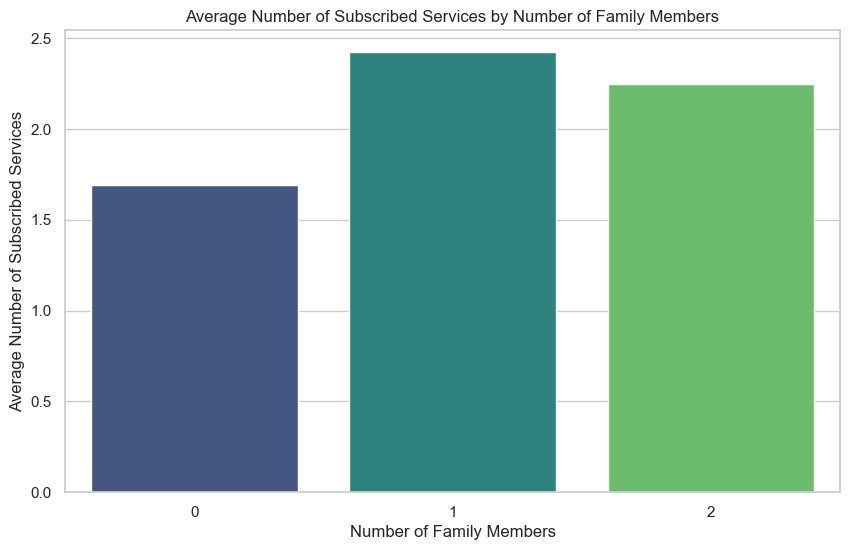

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by num_family_members and calculating mean num_subscribed_services
grouped_data = df.groupby('num_family_members')['num_subscribed_services'].mean().reset_index()

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='num_family_members', y='num_subscribed_services', data=grouped_data, palette='viridis')
plt.title('Average Number of Subscribed Services by Number of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Average Number of Subscribed Services')
plt.xticks(rotation=0)
plt.show()


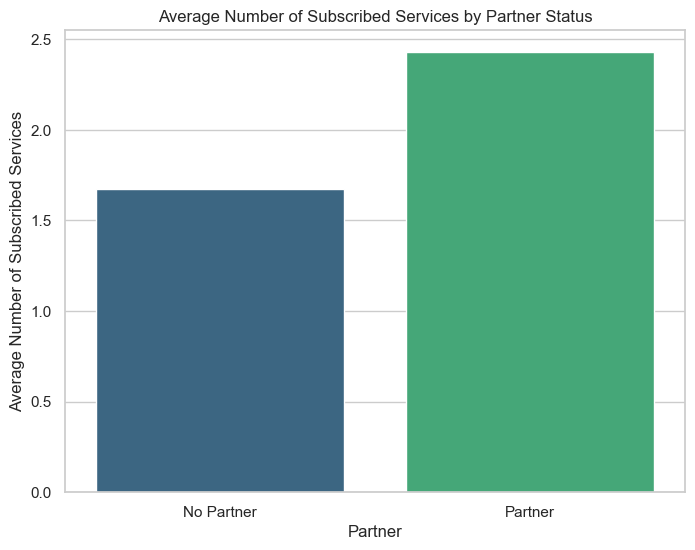

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by Partner and calculating mean num_subscribed_services
grouped_data = df.groupby('Partner')['num_subscribed_services'].mean().reset_index()

# Plotting bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Partner', y='num_subscribed_services', data=grouped_data, palette='viridis')
plt.title('Average Number of Subscribed Services by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Average Number of Subscribed Services')
plt.xticks([0, 1], ['No Partner', 'Partner'])
plt.show()


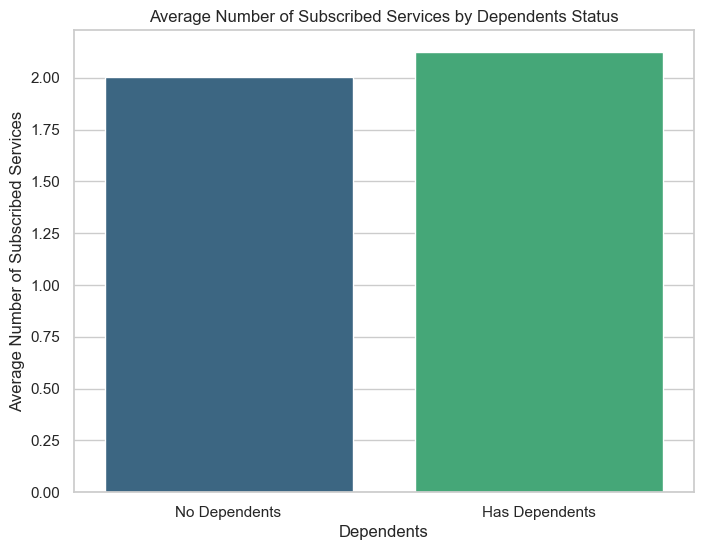

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by Dependents and calculating mean num_subscribed_services
grouped_data = df.groupby('Dependents')['num_subscribed_services'].mean().reset_index()

# Plotting bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Dependents', y='num_subscribed_services', data=grouped_data, palette='viridis')
plt.title('Average Number of Subscribed Services by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Average Number of Subscribed Services')
plt.xticks([0, 1], ['No Dependents', 'Has Dependents'])
plt.show()


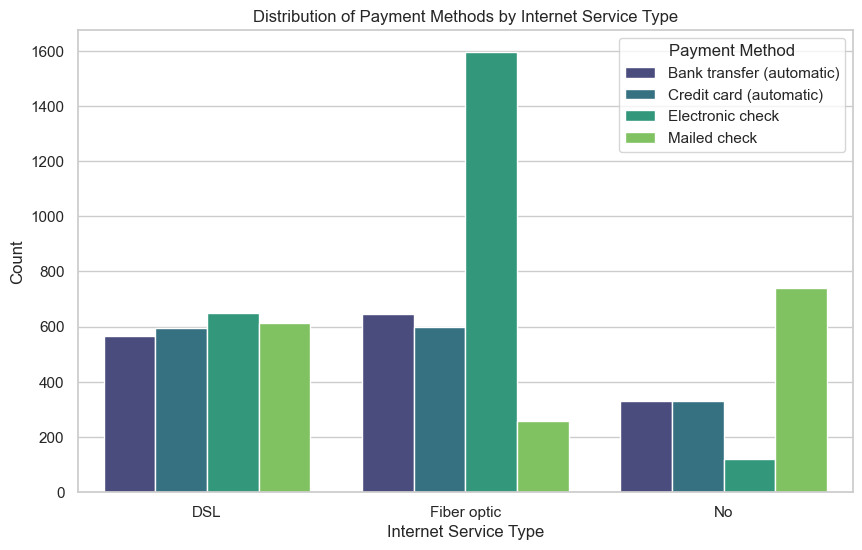

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by InternetService and PaymentMethod and calculating counts
grouped_data = df.groupby(['InternetService', 'PaymentMethod']).size().reset_index(name='count')

# Plotting grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='InternetService', y='count', hue='PaymentMethod', data=grouped_data, palette='viridis')
plt.title('Distribution of Payment Methods by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Method', loc='upper right')
plt.show()


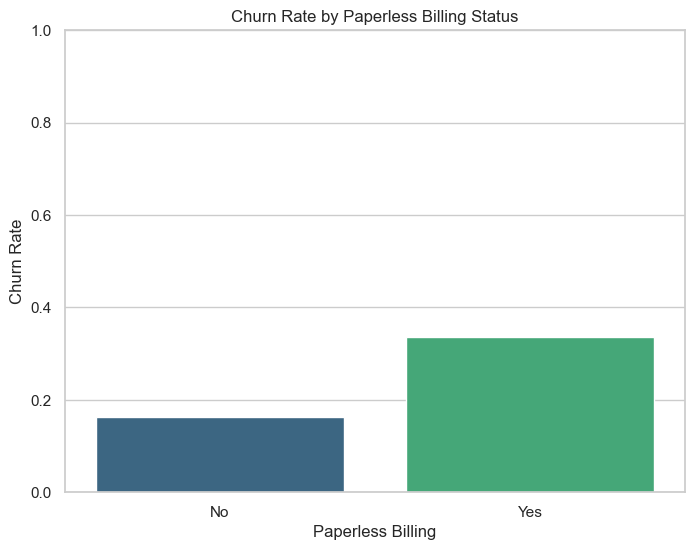

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a new column to convert 'Churn' to numeric
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Grouping by PaperlessBilling and calculating mean churn rate
churn_rate_by_paperless_billing = df.groupby('PaperlessBilling')['Churn_numeric'].mean().reset_index()

# Renaming the columns for clarity
churn_rate_by_paperless_billing.columns = ['PaperlessBilling', 'ChurnRate']

# Plotting the churn rate by PaperlessBilling
plt.figure(figsize=(8, 6))
sns.barplot(x='PaperlessBilling', y='ChurnRate', data=churn_rate_by_paperless_billing, palette='viridis')
plt.title('Churn Rate by Paperless Billing Status')
plt.xlabel('Paperless Billing')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(0, 1)  # Setting y-axis limit to 0-1 for percentage representation
plt.show()


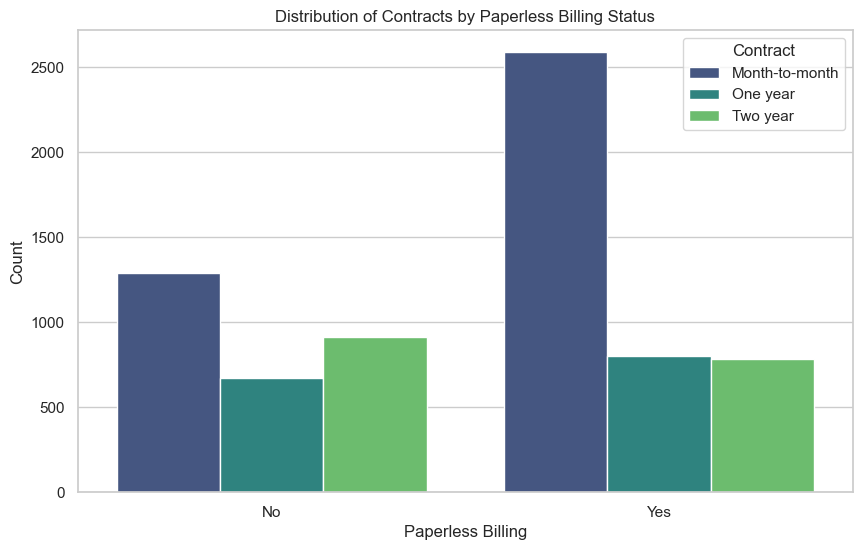

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by PaperlessBilling and Contract and calculating counts
grouped_data = df.groupby(['PaperlessBilling', 'Contract']).size().reset_index(name='count')

# Plotting grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PaperlessBilling', y='count', hue='Contract', data=grouped_data, palette='viridis')
plt.title('Distribution of Contracts by Paperless Billing Status')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Contract', loc='upper right')
plt.show()


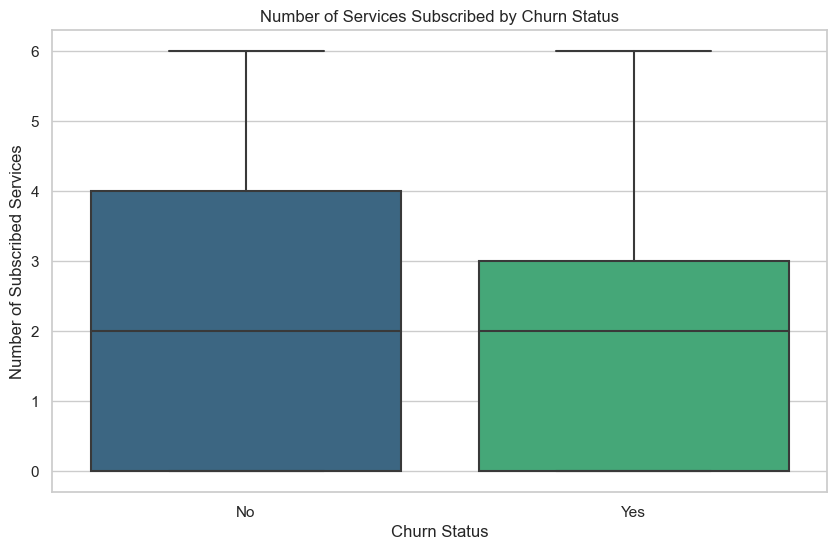

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='num_subscribed_services', data=df, palette='viridis')
plt.title('Number of Services Subscribed by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Subscribed Services')
plt.show()


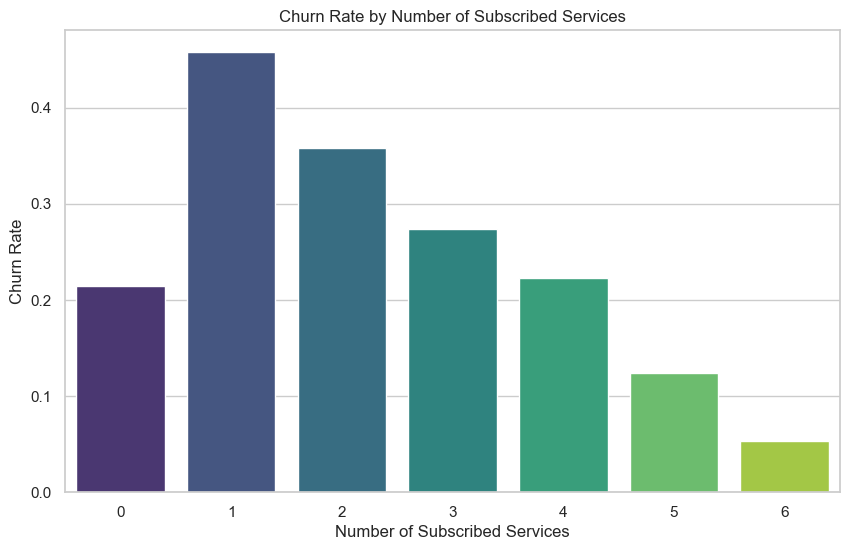

In [71]:
# Calculate churn rate by number of subscribed services
churn_rate_by_subs = df.groupby('num_subscribed_services')['Churn_numeric'].mean().reset_index(name='churn_rate')

# Plotting churn rate by number of subscribed services
plt.figure(figsize=(10, 6))
sns.barplot(x='num_subscribed_services', y='churn_rate', data=churn_rate_by_subs, palette='viridis')
plt.title('Churn Rate by Number of Subscribed Services')
plt.xlabel('Number of Subscribed Services')
plt.ylabel('Churn Rate')
plt.show()


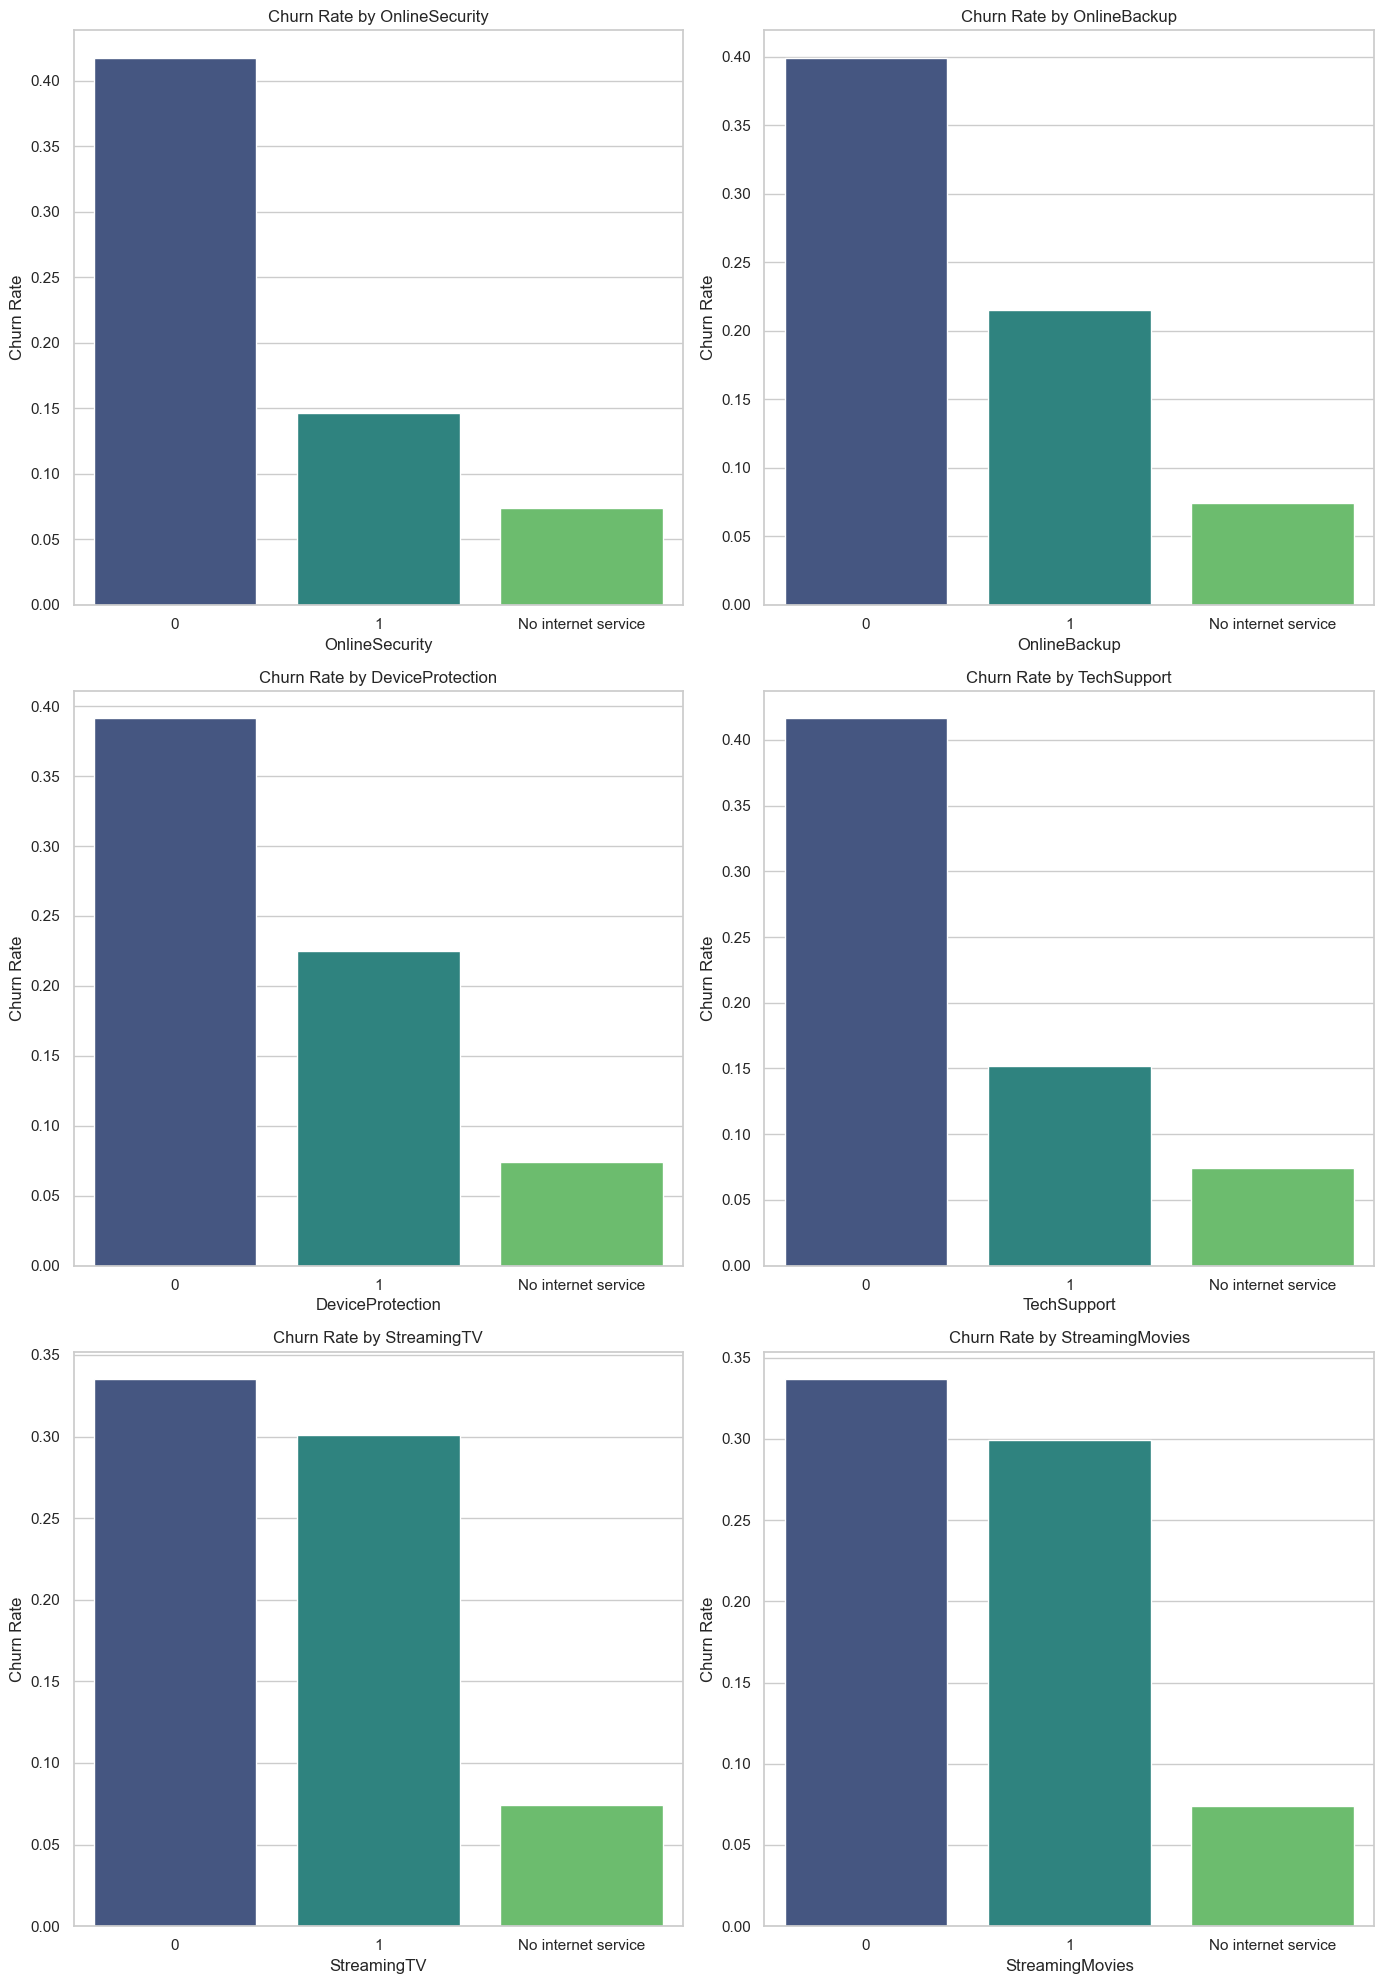

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of online services to analyze
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Creating individual bar plots for each service
plt.figure(figsize=(14, 20))

for i, service in enumerate(services):
    plt.subplot(3, 2, i + 1)
    service_churn_rate = df.groupby(service)['Churn_numeric'].mean().reset_index(name='churn_rate')
    sns.barplot(x=service, y='churn_rate', data=service_churn_rate, palette='viridis')
    plt.title(f'Churn Rate by {service}')
    plt.xlabel(service)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


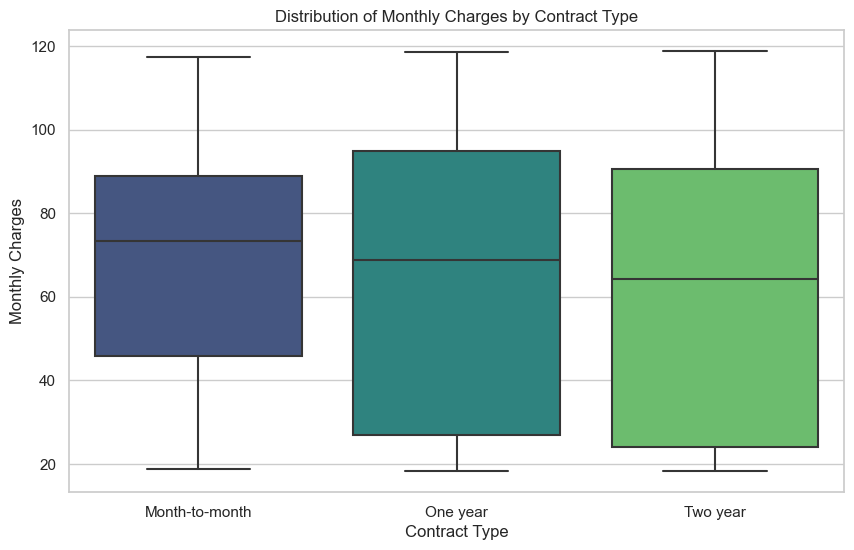

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df, palette='viridis')
plt.title('Distribution of Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()
